# Task 1

In [1]:
a1 = -80976.9
b1 = 1.6843*10**8
ice_22_s = a1*2022 + b1
ice_23_s = a1*2023 + b1
ice_24_s = a1*2024 + b1
print(ice_22_s, ice_23_s, ice_24_s)

4694708.200000018 4613731.300000012 4532754.400000006


In [2]:
a2 = -39091.8
b2 = 9.3554*10**7
ice_22_m = a2*2022 + b2
ice_23_m = a2*2023 + b2
ice_24_m = a2*2024 + b2
print(ice_22_m, ice_23_m, ice_24_m)

14510380.399999991 14471288.599999994 14432196.799999997


In [3]:
m21_y = 14788800
m79_y = 16445000
m_diff = m79_y - m21_y

s21_y = 5569150
s79_y = 7556040
s_diff = s79_y - s21_y

print(f"March ice area difference in observations: {m_diff} km2")
print(f"September ice area difference in observations: {s_diff} km2")

print(f"March ice area difference until today: {m79_y - ice_24_m} km2")
print(f"September ice area difference until today: {s79_y - ice_24_s} km2")

March ice area difference in observations: 1656200 km2
September ice area difference in observations: 1986890 km2
March ice area difference until today: 2012803.200000003 km2
September ice area difference until today: 3023285.599999994 km2


In [4]:
year = (1000000-1.6843*10**8)/-80976.9
print(f"Year when the ice area will be 1 million km2: {year}")
years_left = year - 2024
print(f"Years left until the ice area will be 1 million km2: {years_left}")

Year when the ice area will be 1 million km2: 2067.626693538528
Years left until the ice area will be 1 million km2: 43.62669353852789


In [7]:
print((s_diff) / 3e-6)
print((s79_y - ice_24_s) / 3e-6)

662296666666.6666
1007761866666.6647


# Task 2

Required cumulative emissions to reach ice-free Arctic: 2.19e+12 metric tons
The Arctic is projected to be ice-free by the year 2045 based on global emissions.


C:\Users\Damsgaard\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


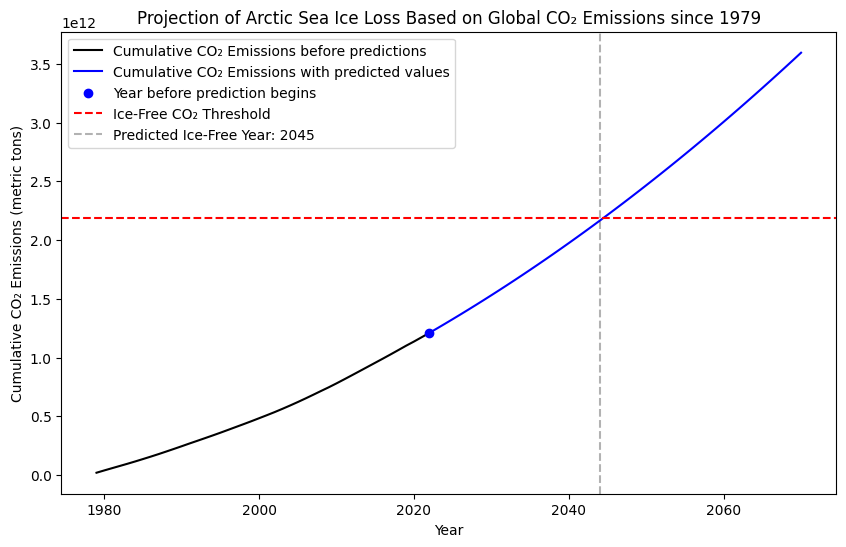

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'annual-co2-emissions-per-country.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Step 1: Filter data to include only global (world) emissions
global_emissions = data[(data["Entity"] == "World") & (data["Year"] >= 1979)]

# Step 2: Fit a linear regression model to predict future CO₂ emissions based on global data
X = global_emissions[["Year"]]
y = global_emissions["Annual CO₂ emissions"]
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict future emissions up to a target year
future_years = np.arange(global_emissions["Year"].max() + 1, 2071).reshape(-1, 1)
predicted_emissions = model.predict(future_years)

# Combine historical and predicted emissions data
all_years = np.concatenate([X, future_years])
all_emissions = np.concatenate([y, predicted_emissions])

# Calculate cumulative emissions from global data
cumulative_emissions = np.cumsum(all_emissions)
cumulative_y = np.cumsum(y)
cumulative_preds = np.cumsum(predicted_emissions)

# Constants for Notz and Stroeve model
current_ice_extent_km2 = 7556042.0  # Current sea ice extent in km²
target_ice_extent_km2 = 1e6         # Target sea ice extent in km²
emission_sensitivity = 3            # Sensitivity in m² per ton of CO₂

# Calculate the threshold in terms of cumulative emissions needed to reach ice-free Arctic
ice_loss_threshold_m2 = (current_ice_extent_km2 - target_ice_extent_km2) * 1e6  # km² to m²
required_cumulative_emissions = ice_loss_threshold_m2 / emission_sensitivity
print(f"Required cumulative emissions to reach ice-free Arctic: {required_cumulative_emissions:.2e} metric tons")

# Find the projected year when cumulative emissions exceed the threshold
ice_free_year = all_years[np.argmax(cumulative_emissions >= required_cumulative_emissions)][0]
print(f"The Arctic is projected to be ice-free by the year {ice_free_year} based on global emissions.")

# Plot cumulative emissions, ice-free threshold, and the predicted year
plt.figure(figsize=(10, 6))
#plt.plot(all_years, cumulative_emissions, label="Cumulative CO₂ Emissions (World)", color='black')
plt.plot(all_years[:len(X)], cumulative_emissions[:len(y)], label="Cumulative CO₂ Emissions before predictions", color='black')
plt.plot(all_years[len(X)-1:], cumulative_emissions[len(y)-1:], label="Cumulative CO₂ Emissions with predicted values", color='blue')
plt.scatter(global_emissions["Year"].max(), cumulative_emissions[43], color='blue', zorder=5, label="Year before prediction begins")
plt.axhline(required_cumulative_emissions, color='red', linestyle='--', label="Ice-Free CO₂ Threshold")
plt.axvline(ice_free_year-1, color='black', alpha=0.3, linestyle='--', label=f"Predicted Ice-Free Year: {ice_free_year}")
plt.xlabel("Year")
plt.ylabel("Cumulative CO₂ Emissions (metric tons)")
plt.legend()
plt.title("Projection of Arctic Sea Ice Loss Based on Global CO₂ Emissions since 1979")
plt.savefig("notz_stove_prediction.png")
plt.show()